In [151]:
#PREP
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy.stats 

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#loading the csv file
df = pd.read_csv("C://Users//49152//Downloads//280323_data_output_case_study.csv")

In [4]:
df

zip_code location_name                      provider  \
0      81671       München   Octopus Energy Germany GmbH   
1      81671       München              Yello Strom GmbH   
2      81671       München  Vattenfall Europe Sales GmbH   
3      81671       München  Vattenfall Europe Sales GmbH   
4      81671       München   Octopus Energy Germany GmbH   
..       ...           ...                           ...   
91     81671       München                   eprimo GmbH   
92     81671       München  Vattenfall Europe Sales GmbH   
93     81671       München  Vattenfall Europe Sales GmbH   
94     81671       München                   eprimo GmbH   
95     81671       München                   eprimo GmbH   

                       product  consumption_level_kwh  agg_cost_year  \
0      OctopusOptimus 12 Strom                   2000         845.89   
1       Mein Yello Strom Basic                   3000        1162.98   
2                Natur12 Strom                   3000        1144.90   
3                 Easy12 Strom                   3000        1136.90   
4      OctopusOptimus 12 Strom                   2000         845.89   
..                         ...                    ...            ...   
91  eprimoStrom PrimaKlima Pur                   2000         735.67   
92               Natur12 Strom                   3000        1104.90   
93                Easy12 Strom                   3000        1106.90   
94      eprimoStrom PrimaKlima                   2000         712.65   
95  eprimoStrom PrimaKlima Pur                   2000         735.67   

    standing_charge_year  consumption_cost_year  signup_bonus  \
0                  98.09                 747.80          0.00   
1                 153.80                1051.20         42.02   
2                 112.80                1052.10         20.00   
3                  94.80                1052.10         10.00   
4                  98.09                 747.80          0.00   
..                   ...                    ...           ...   
91                 80.27                 787.40        132.00   
92                112.80                1022.10         30.00   
93                 94.80                1022.10         10.00   
94                 82.65                 799.00        169.00   
95                 80.27                 787.40        132.00   

    price_guarantee  contract_length report_date  
0                12                1  2023-03-06  
1                12               12  2023-03-02  
2                12               12  2023-03-02  
3                12               12  2023-03-02  
4                12                1  2023-03-02  
..              ...              ...         ...  
91               12               12  2023-03-16  
92               12               12  2023-03-16  
93               12               12  2023-03-16  
94               12               12  2023-03-15  
95               12               12  2023-03-15  

[96 rows x 12 columns]

In [5]:
#BASIC STATISTICS
df.head()

zip_code location_name                      provider  \
0     81671       München   Octopus Energy Germany GmbH   
1     81671       München              Yello Strom GmbH   
2     81671       München  Vattenfall Europe Sales GmbH   
3     81671       München  Vattenfall Europe Sales GmbH   
4     81671       München   Octopus Energy Germany GmbH   

                   product  consumption_level_kwh  agg_cost_year  \
0  OctopusOptimus 12 Strom                   2000         845.89   
1   Mein Yello Strom Basic                   3000        1162.98   
2            Natur12 Strom                   3000        1144.90   
3             Easy12 Strom                   3000        1136.90   
4  OctopusOptimus 12 Strom                   2000         845.89   

   standing_charge_year  consumption_cost_year  signup_bonus  price_guarantee  \
0                 98.09                 747.80          0.00               12   
1                153.80                1051.20         42.02               12   
2                112.80                1052.10         20.00               12   
3                 94.80                1052.10         10.00               12   
4                 98.09                 747.80          0.00               12   

   contract_length report_date  
0                1  2023-03-06  
1               12  2023-03-02  
2               12  2023-03-02  
3               12  2023-03-02  
4                1  2023-03-02

In [6]:
#NA check
df.isnull().sum().sum()

0

In [7]:
#columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   zip_code               96 non-null     int64  
 1   location_name          96 non-null     object 
 2   provider               96 non-null     object 
 3   product                96 non-null     object 
 4   consumption_level_kwh  96 non-null     int64  
 5   agg_cost_year          96 non-null     float64
 6   standing_charge_year   96 non-null     float64
 7   consumption_cost_year  96 non-null     float64
 8   signup_bonus           96 non-null     float64
 9   price_guarantee        96 non-null     int64  
 10  contract_length        96 non-null     int64  
 11  report_date            96 non-null     object 
dtypes: float64(4), int64(4), object(4)
memory usage: 9.1+ KB


In [8]:
#overview of the values each column contains, only analyzes numeric columns
df.describe()

zip_code  consumption_level_kwh  agg_cost_year  standing_charge_year  \
count     96.00                  96.00          96.00                 96.00   
mean   81671.00                2760.42        1003.91                106.99   
std        0.00                 891.42         244.17                 20.25   
min    81671.00                2000.00         697.65                 80.27   
25%    81671.00                2000.00         813.76                 94.80   
50%    81671.00                2000.00         862.31                 98.09   
75%    81671.00                4000.00        1285.49                133.49   
max    81671.00                4000.00        1416.69                153.80   

       consumption_cost_year  signup_bonus  price_guarantee  contract_length  
count                  96.00         96.00            96.00            96.00  
mean                 1034.84        137.92            14.00             8.33  
std                   337.53        143.83             4.50             5.21  
min                   715.67          0.00            12.00             1.00  
25%                   747.80          0.00            12.00             1.00  
50%                   852.20        132.00            12.00            12.00  
75%                  1470.30        300.00            12.00            12.00  
max                  1667.20        384.00            24.00            12.00

In [9]:
# -> include -> some descriptive statistics
df.describe(include=object)

location_name                     provider                  product  \
count             96                           96                       96   
unique             1                            5                       10   
top          München  Octopus Energy Germany GmbH  OctopusOptimus 12 Strom   
freq              96                           32                       16   

       report_date  
count           96  
unique          16  
top     2023-03-16  
freq             8

In [10]:
#addition of a new column - aggr price (per kwh)
df["aggr_per_kwh"] = df["agg_cost_year"] / df["consumption_level_kwh"]

In [11]:
df

zip_code location_name                      provider  \
0      81671       München   Octopus Energy Germany GmbH   
1      81671       München              Yello Strom GmbH   
2      81671       München  Vattenfall Europe Sales GmbH   
3      81671       München  Vattenfall Europe Sales GmbH   
4      81671       München   Octopus Energy Germany GmbH   
..       ...           ...                           ...   
91     81671       München                   eprimo GmbH   
92     81671       München  Vattenfall Europe Sales GmbH   
93     81671       München  Vattenfall Europe Sales GmbH   
94     81671       München                   eprimo GmbH   
95     81671       München                   eprimo GmbH   

                       product  consumption_level_kwh  agg_cost_year  \
0      OctopusOptimus 12 Strom                   2000         845.89   
1       Mein Yello Strom Basic                   3000        1162.98   
2                Natur12 Strom                   3000        1144.90   
3                 Easy12 Strom                   3000        1136.90   
4      OctopusOptimus 12 Strom                   2000         845.89   
..                         ...                    ...            ...   
91  eprimoStrom PrimaKlima Pur                   2000         735.67   
92               Natur12 Strom                   3000        1104.90   
93                Easy12 Strom                   3000        1106.90   
94      eprimoStrom PrimaKlima                   2000         712.65   
95  eprimoStrom PrimaKlima Pur                   2000         735.67   

    standing_charge_year  consumption_cost_year  signup_bonus  \
0                  98.09                 747.80          0.00   
1                 153.80                1051.20         42.02   
2                 112.80                1052.10         20.00   
3                  94.80                1052.10         10.00   
4                  98.09                 747.80          0.00   
..                   ...                    ...           ...   
91                 80.27                 787.40        132.00   
92                112.80                1022.10         30.00   
93                 94.80                1022.10         10.00   
94                 82.65                 799.00        169.00   
95                 80.27                 787.40        132.00   

    price_guarantee  contract_length report_date  aggr_per_kwh  
0                12                1  2023-03-06          0.42  
1                12               12  2023-03-02          0.39  
2                12               12  2023-03-02          0.38  
3                12               12  2023-03-02          0.38  
4                12                1  2023-03-02          0.42  
..              ...              ...         ...           ...  
91               12               12  2023-03-16          0.37  
92               12               12  2023-03-16          0.37  
93               12               12  2023-03-16          0.37  
94               12               12  2023-03-15          0.36  
95               12               12  2023-03-15          0.37  

[96 rows x 13 columns]

In [12]:
#addition of a new column - consumption price (per kwh)
df["consumption_price"] = df["consumption_cost_year"] / df["consumption_level_kwh"]

In [13]:
df

zip_code location_name                      provider  \
0      81671       München   Octopus Energy Germany GmbH   
1      81671       München              Yello Strom GmbH   
2      81671       München  Vattenfall Europe Sales GmbH   
3      81671       München  Vattenfall Europe Sales GmbH   
4      81671       München   Octopus Energy Germany GmbH   
..       ...           ...                           ...   
91     81671       München                   eprimo GmbH   
92     81671       München  Vattenfall Europe Sales GmbH   
93     81671       München  Vattenfall Europe Sales GmbH   
94     81671       München                   eprimo GmbH   
95     81671       München                   eprimo GmbH   

                       product  consumption_level_kwh  agg_cost_year  \
0      OctopusOptimus 12 Strom                   2000         845.89   
1       Mein Yello Strom Basic                   3000        1162.98   
2                Natur12 Strom                   3000        1144.90   
3                 Easy12 Strom                   3000        1136.90   
4      OctopusOptimus 12 Strom                   2000         845.89   
..                         ...                    ...            ...   
91  eprimoStrom PrimaKlima Pur                   2000         735.67   
92               Natur12 Strom                   3000        1104.90   
93                Easy12 Strom                   3000        1106.90   
94      eprimoStrom PrimaKlima                   2000         712.65   
95  eprimoStrom PrimaKlima Pur                   2000         735.67   

    standing_charge_year  consumption_cost_year  signup_bonus  \
0                  98.09                 747.80          0.00   
1                 153.80                1051.20         42.02   
2                 112.80                1052.10         20.00   
3                  94.80                1052.10         10.00   
4                  98.09                 747.80          0.00   
..                   ...                    ...           ...   
91                 80.27                 787.40        132.00   
92                112.80                1022.10         30.00   
93                 94.80                1022.10         10.00   
94                 82.65                 799.00        169.00   
95                 80.27                 787.40        132.00   

    price_guarantee  contract_length report_date  aggr_per_kwh  \
0                12                1  2023-03-06          0.42   
1                12               12  2023-03-02          0.39   
2                12               12  2023-03-02          0.38   
3                12               12  2023-03-02          0.38   
4                12                1  2023-03-02          0.42   
..              ...              ...         ...           ...   
91               12               12  2023-03-16          0.37   
92               12               12  2023-03-16          0.37   
93               12               12  2023-03-16          0.37   
94               12               12  2023-03-15          0.36   
95               12               12  2023-03-15          0.37   

    consumption_price  
0                0.37  
1                0.35  
2                0.35  
3                0.35  
4                0.37  
..                ...  
91               0.39  
92               0.34  
93               0.34  
94               0.40  
95               0.39  

[96 rows x 14 columns]

In [14]:
#addition of a new column - standing charge/ agg cost ratio 
df["standing_charge_percent"] = df["standing_charge_year"] / df["agg_cost_year"]*100

In [15]:
df

zip_code location_name                      provider  \
0      81671       München   Octopus Energy Germany GmbH   
1      81671       München              Yello Strom GmbH   
2      81671       München  Vattenfall Europe Sales GmbH   
3      81671       München  Vattenfall Europe Sales GmbH   
4      81671       München   Octopus Energy Germany GmbH   
..       ...           ...                           ...   
91     81671       München                   eprimo GmbH   
92     81671       München  Vattenfall Europe Sales GmbH   
93     81671       München  Vattenfall Europe Sales GmbH   
94     81671       München                   eprimo GmbH   
95     81671       München                   eprimo GmbH   

                       product  consumption_level_kwh  agg_cost_year  \
0      OctopusOptimus 12 Strom                   2000         845.89   
1       Mein Yello Strom Basic                   3000        1162.98   
2                Natur12 Strom                   3000        1144.90   
3                 Easy12 Strom                   3000        1136.90   
4      OctopusOptimus 12 Strom                   2000         845.89   
..                         ...                    ...            ...   
91  eprimoStrom PrimaKlima Pur                   2000         735.67   
92               Natur12 Strom                   3000        1104.90   
93                Easy12 Strom                   3000        1106.90   
94      eprimoStrom PrimaKlima                   2000         712.65   
95  eprimoStrom PrimaKlima Pur                   2000         735.67   

    standing_charge_year  consumption_cost_year  signup_bonus  \
0                  98.09                 747.80          0.00   
1                 153.80                1051.20         42.02   
2                 112.80                1052.10         20.00   
3                  94.80                1052.10         10.00   
4                  98.09                 747.80          0.00   
..                   ...                    ...           ...   
91                 80.27                 787.40        132.00   
92                112.80                1022.10         30.00   
93                 94.80                1022.10         10.00   
94                 82.65                 799.00        169.00   
95                 80.27                 787.40        132.00   

    price_guarantee  contract_length report_date  aggr_per_kwh  \
0                12                1  2023-03-06          0.42   
1                12               12  2023-03-02          0.39   
2                12               12  2023-03-02          0.38   
3                12               12  2023-03-02          0.38   
4                12                1  2023-03-02          0.42   
..              ...              ...         ...           ...   
91               12               12  2023-03-16          0.37   
92               12               12  2023-03-16          0.37   
93               12               12  2023-03-16          0.37   
94               12               12  2023-03-15          0.36   
95               12               12  2023-03-15          0.37   

    consumption_price  standing_charge_percent  
0                0.37                    11.60  
1                0.35                    13.22  
2                0.35                     9.85  
3                0.35                     8.34  
4                0.37                    11.60  
..                ...                      ...  
91               0.39                    10.91  
92               0.34                    10.21  
93               0.34                     8.56  
94               0.40                    11.60  
95               0.39                    10.91  

[96 rows x 15 columns]

In [16]:
#addition of a new column - consumption cost/ agg cost ratio 
df["consumption_cost_percent"] = df["consumption_cost_year"] / df["agg_cost_year"]*100

In [17]:
df

zip_code location_name                      provider  \
0      81671       München   Octopus Energy Germany GmbH   
1      81671       München              Yello Strom GmbH   
2      81671       München  Vattenfall Europe Sales GmbH   
3      81671       München  Vattenfall Europe Sales GmbH   
4      81671       München   Octopus Energy Germany GmbH   
..       ...           ...                           ...   
91     81671       München                   eprimo GmbH   
92     81671       München  Vattenfall Europe Sales GmbH   
93     81671       München  Vattenfall Europe Sales GmbH   
94     81671       München                   eprimo GmbH   
95     81671       München                   eprimo GmbH   

                       product  consumption_level_kwh  agg_cost_year  \
0      OctopusOptimus 12 Strom                   2000         845.89   
1       Mein Yello Strom Basic                   3000        1162.98   
2                Natur12 Strom                   3000        1144.90   
3                 Easy12 Strom                   3000        1136.90   
4      OctopusOptimus 12 Strom                   2000         845.89   
..                         ...                    ...            ...   
91  eprimoStrom PrimaKlima Pur                   2000         735.67   
92               Natur12 Strom                   3000        1104.90   
93                Easy12 Strom                   3000        1106.90   
94      eprimoStrom PrimaKlima                   2000         712.65   
95  eprimoStrom PrimaKlima Pur                   2000         735.67   

    standing_charge_year  consumption_cost_year  signup_bonus  \
0                  98.09                 747.80          0.00   
1                 153.80                1051.20         42.02   
2                 112.80                1052.10         20.00   
3                  94.80                1052.10         10.00   
4                  98.09                 747.80          0.00   
..                   ...                    ...           ...   
91                 80.27                 787.40        132.00   
92                112.80                1022.10         30.00   
93                 94.80                1022.10         10.00   
94                 82.65                 799.00        169.00   
95                 80.27                 787.40        132.00   

    price_guarantee  contract_length report_date  aggr_per_kwh  \
0                12                1  2023-03-06          0.42   
1                12               12  2023-03-02          0.39   
2                12               12  2023-03-02          0.38   
3                12               12  2023-03-02          0.38   
4                12                1  2023-03-02          0.42   
..              ...              ...         ...           ...   
91               12               12  2023-03-16          0.37   
92               12               12  2023-03-16          0.37   
93               12               12  2023-03-16          0.37   
94               12               12  2023-03-15          0.36   
95               12               12  2023-03-15          0.37   

    consumption_price  standing_charge_percent  consumption_cost_percent  
0                0.37                    11.60                     88.40  
1                0.35                    13.22                     90.39  
2                0.35                     9.85                     91.89  
3                0.35                     8.34                     92.54  
4                0.37                    11.60                     88.40  
..                ...                      ...                       ...  
91               0.39                    10.91                    107.03  
92               0.34                    10.21                     92.51  
93               0.34                     8.56                     92.34  
94               0.40                    11.60                    112.12  
95               0.

In [18]:
#addition of a new column - bonus / agg cost ratio 
df["bonus_percent"] = df["signup_bonus"] / df["agg_cost_year"]*100

In [19]:
df

zip_code location_name                      provider  \
0      81671       München   Octopus Energy Germany GmbH   
1      81671       München              Yello Strom GmbH   
2      81671       München  Vattenfall Europe Sales GmbH   
3      81671       München  Vattenfall Europe Sales GmbH   
4      81671       München   Octopus Energy Germany GmbH   
..       ...           ...                           ...   
91     81671       München                   eprimo GmbH   
92     81671       München  Vattenfall Europe Sales GmbH   
93     81671       München  Vattenfall Europe Sales GmbH   
94     81671       München                   eprimo GmbH   
95     81671       München                   eprimo GmbH   

                       product  consumption_level_kwh  agg_cost_year  \
0      OctopusOptimus 12 Strom                   2000         845.89   
1       Mein Yello Strom Basic                   3000        1162.98   
2                Natur12 Strom                   3000        1144.90   
3                 Easy12 Strom                   3000        1136.90   
4      OctopusOptimus 12 Strom                   2000         845.89   
..                         ...                    ...            ...   
91  eprimoStrom PrimaKlima Pur                   2000         735.67   
92               Natur12 Strom                   3000        1104.90   
93                Easy12 Strom                   3000        1106.90   
94      eprimoStrom PrimaKlima                   2000         712.65   
95  eprimoStrom PrimaKlima Pur                   2000         735.67   

    standing_charge_year  consumption_cost_year  signup_bonus  \
0                  98.09                 747.80          0.00   
1                 153.80                1051.20         42.02   
2                 112.80                1052.10         20.00   
3                  94.80                1052.10         10.00   
4                  98.09                 747.80          0.00   
..                   ...                    ...           ...   
91                 80.27                 787.40        132.00   
92                112.80                1022.10         30.00   
93                 94.80                1022.10         10.00   
94                 82.65                 799.00        169.00   
95                 80.27                 787.40        132.00   

    price_guarantee  contract_length report_date  aggr_per_kwh  \
0                12                1  2023-03-06          0.42   
1                12               12  2023-03-02          0.39   
2                12               12  2023-03-02          0.38   
3                12               12  2023-03-02          0.38   
4                12                1  2023-03-02          0.42   
..              ...              ...         ...           ...   
91               12               12  2023-03-16          0.37   
92               12               12  2023-03-16          0.37   
93               12               12  2023-03-16          0.37   
94               12               12  2023-03-15          0.36   
95               12               12  2023-03-15          0.37   

    consumption_price  standing_charge_percent  consumption_cost_percent  \
0                0.37                    11.60                     88.40   
1                0.35                    13.22                     90.39   
2                0.35                     9.85                     91.89   
3                0.35                     8.34                     92.54   
4                0.37                    11.60                     88.40   
..                ...                      ...                       ...   
91               0.39                    10.91                    107.03   
92               0.34                    10.21                     92.51   
93               0.34                     8.56                     92.34   
94               0.40                    11.60                    112.12   
95      

In [20]:
#ratio check
df["check1"] = df.apply(lambda row: row.standing_charge_percent + row.consumption_cost_percent -row.bonus_percent, axis = 1)

In [21]:
df

zip_code location_name                      provider  \
0      81671       München   Octopus Energy Germany GmbH   
1      81671       München              Yello Strom GmbH   
2      81671       München  Vattenfall Europe Sales GmbH   
3      81671       München  Vattenfall Europe Sales GmbH   
4      81671       München   Octopus Energy Germany GmbH   
..       ...           ...                           ...   
91     81671       München                   eprimo GmbH   
92     81671       München  Vattenfall Europe Sales GmbH   
93     81671       München  Vattenfall Europe Sales GmbH   
94     81671       München                   eprimo GmbH   
95     81671       München                   eprimo GmbH   

                       product  consumption_level_kwh  agg_cost_year  \
0      OctopusOptimus 12 Strom                   2000         845.89   
1       Mein Yello Strom Basic                   3000        1162.98   
2                Natur12 Strom                   3000        1144.90   
3                 Easy12 Strom                   3000        1136.90   
4      OctopusOptimus 12 Strom                   2000         845.89   
..                         ...                    ...            ...   
91  eprimoStrom PrimaKlima Pur                   2000         735.67   
92               Natur12 Strom                   3000        1104.90   
93                Easy12 Strom                   3000        1106.90   
94      eprimoStrom PrimaKlima                   2000         712.65   
95  eprimoStrom PrimaKlima Pur                   2000         735.67   

    standing_charge_year  consumption_cost_year  signup_bonus  \
0                  98.09                 747.80          0.00   
1                 153.80                1051.20         42.02   
2                 112.80                1052.10         20.00   
3                  94.80                1052.10         10.00   
4                  98.09                 747.80          0.00   
..                   ...                    ...           ...   
91                 80.27                 787.40        132.00   
92                112.80                1022.10         30.00   
93                 94.80                1022.10         10.00   
94                 82.65                 799.00        169.00   
95                 80.27                 787.40        132.00   

    price_guarantee  contract_length report_date  aggr_per_kwh  \
0                12                1  2023-03-06          0.42   
1                12               12  2023-03-02          0.39   
2                12               12  2023-03-02          0.38   
3                12               12  2023-03-02          0.38   
4                12                1  2023-03-02          0.42   
..              ...              ...         ...           ...   
91               12               12  2023-03-16          0.37   
92               12               12  2023-03-16          0.37   
93               12               12  2023-03-16          0.37   
94               12               12  2023-03-15          0.36   
95               12               12  2023-03-15          0.37   

    consumption_price  standing_charge_percent  consumption_cost_percent  \
0                0.37                    11.60                     88.40   
1                0.35                    13.22                     90.39   
2                0.35                     9.85                     91.89   
3                0.35                     8.34                     92.54   
4                0.37                    11.60                     88.40   
..                ...                      ...                       ...   
91               0.39                    10.91                    107.03   
92               0.34                    10.21                     92.51   
93               0.34                     8.56                     92.34   
94               0.40                    11.60                    112.12   
95      

In [22]:
#EXPLORATION
#table values & occurences
df["provider"].value_counts()

Octopus Energy Germany GmbH     32
Fuxx-Die Sparenergie GmbH       29
eprimo GmbH                     20
Vattenfall Europe Sales GmbH    14
Yello Strom GmbH                 1
Name: provider, dtype: int64

In [23]:
df["product"].value_counts()

OctopusOptimus 12 Strom       16
Spar-Fuxx optimal 123         16
Grund-Fuxx optimal            13
eprimoStrom PrimaKlima        13
OctopusOptimus Strom          10
Natur12 Strom                  8
eprimoStrom PrimaKlima Pur     7
Easy12 Strom                   6
OctopusSelect Strom            6
Mein Yello Strom Basic         1
Name: product, dtype: int64

In [24]:
#provider and product
df[["provider","product"]].groupby("provider")["product"].apply(list)

provider
Fuxx-Die Sparenergie GmbH       [Spar-Fuxx optimal 123, Grund-Fuxx optimal, Sp...
Octopus Energy Germany GmbH     [OctopusOptimus 12 Strom, OctopusOptimus 12 St...
Vattenfall Europe Sales GmbH    [Natur12 Strom, Easy12 Strom, Natur12 Strom, N...
Yello Strom GmbH                                         [Mein Yello Strom Basic]
eprimo GmbH                     [eprimoStrom PrimaKlima, eprimoStrom PrimaKlim...
Name: product, dtype: object

In [25]:
#provider and product
dfpp = df.groupby(["provider","product"]).count()["zip_code"]

In [26]:
dfpp

provider                      product                   
Fuxx-Die Sparenergie GmbH     Grund-Fuxx optimal            13
                              Spar-Fuxx optimal 123         16
Octopus Energy Germany GmbH   OctopusOptimus 12 Strom       16
                              OctopusOptimus Strom          10
                              OctopusSelect Strom            6
Vattenfall Europe Sales GmbH  Easy12 Strom                   6
                              Natur12 Strom                  8
Yello Strom GmbH              Mein Yello Strom Basic         1
eprimo GmbH                   eprimoStrom PrimaKlima        13
                              eprimoStrom PrimaKlima Pur     7
Name: zip_code, dtype: int64

In [27]:
#provider_consumption
provider_consumption = df.groupby("provider").agg({"consumption_level_kwh":['min', 'mean', 'max']}) 
provider_consumption

consumption_level_kwh              
                                               min    mean   max
provider                                                        
Fuxx-Die Sparenergie GmbH                     4000 4000.00  4000
Octopus Energy Germany GmbH                   2000 2000.00  2000
Vattenfall Europe Sales GmbH                  3000 3000.00  3000
Yello Strom GmbH                              3000 3000.00  3000
eprimo GmbH                                   2000 2000.00  2000

In [28]:
#provider - product - consumption
prov_prod_consumption = df.groupby(["provider","product"]).agg({"consumption_level_kwh":['min', 'mean', 'max']}) 
prov_prod_consumption

consumption_level_kwh  \
                                                                          min   
provider                     product                                            
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                          4000   
                             Spar-Fuxx optimal 123                       4000   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom                     2000   
                             OctopusOptimus Strom                        2000   
                             OctopusSelect Strom                         2000   
Vattenfall Europe Sales GmbH Easy12 Strom                                3000   
                             Natur12 Strom                               3000   
Yello Strom GmbH             Mein Yello Strom Basic                      3000   
eprimo GmbH                  eprimoStrom PrimaKlima                      2000   
                             eprimoStrom PrimaKlima Pur                  2000   

                                                                       
                                                           mean   max  
provider                     product                                   
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         4000.00  4000  
                             Spar-Fuxx optimal 123      4000.00  4000  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom    2000.00  2000  
                             OctopusOptimus Strom       2000.00  2000  
                             OctopusSelect Strom        2000.00  2000  
Vattenfall Europe Sales GmbH Easy12 Strom               3000.00  3000  
                             Natur12 Strom              3000.00  3000  
Yello Strom GmbH             Mein Yello Strom Basic     3000.00  3000  
eprimo GmbH                  eprimoStrom PrimaKlima     2000.00  2000  
                             eprimoStrom PrimaKlima Pur 2000.00  2000

In [29]:
#provider - product - consumption price
prov_prod_cons_price = df.groupby(["provider","product"]).agg({"consumption_price":['min', 'mean', 'max']}) 
prov_prod_cons_price

consumption_price  \
                                                                      min   
provider                     product                                        
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                      0.36   
                             Spar-Fuxx optimal 123                   0.37   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom                 0.36   
                             OctopusOptimus Strom                    0.36   
                             OctopusSelect Strom                     0.38   
Vattenfall Europe Sales GmbH Easy12 Strom                            0.34   
                             Natur12 Strom                           0.34   
Yello Strom GmbH             Mein Yello Strom Basic                  0.35   
eprimo GmbH                  eprimoStrom PrimaKlima                  0.40   
                             eprimoStrom PrimaKlima Pur              0.39   

                                                                   
                                                        mean  max  
provider                     product                               
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         0.37 0.39  
                             Spar-Fuxx optimal 123      0.39 0.42  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom    0.36 0.37  
                             OctopusOptimus Strom       0.36 0.36  
                             OctopusSelect Strom        0.38 0.38  
Vattenfall Europe Sales GmbH Easy12 Strom               0.35 0.35  
                             Natur12 Strom              0.34 0.35  
Yello Strom GmbH             Mein Yello Strom Basic     0.35 0.35  
eprimo GmbH                  eprimoStrom PrimaKlima     0.41 0.43  
                             eprimoStrom PrimaKlima Pur 0.39 0.39

In [30]:
#provider- consumption price
prov_cons_price = df.groupby(["provider"]).agg({"consumption_price":['min', 'mean', 'max']}) 
prov_cons_price

consumption_price          
                                           min mean  max
provider                                                
Fuxx-Die Sparenergie GmbH                 0.36 0.38 0.42
Octopus Energy Germany GmbH               0.36 0.37 0.38
Vattenfall Europe Sales GmbH              0.34 0.34 0.35
Yello Strom GmbH                          0.35 0.35 0.35
eprimo GmbH                               0.39 0.41 0.43

In [31]:
#provider - product - aggr_cost
prov_prod_agg_cost = df.groupby(["provider","product"]).agg({"agg_cost_year":['min', 'mean', 'max']}) 
prov_prod_agg_cost

agg_cost_year          \
                                                                  min    mean   
provider                     product                                            
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal               1287.29 1325.66   
                             Spar-Fuxx optimal 123            1256.69 1317.75   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom           813.76  825.81   
                             OctopusOptimus Strom              826.13  826.13   
                             OctopusSelect Strom               862.31  862.31   
Vattenfall Europe Sales GmbH Easy12 Strom                     1106.90 1121.90   
                             Natur12 Strom                    1104.90 1119.90   
Yello Strom GmbH             Mein Yello Strom Basic           1162.98 1162.98   
eprimo GmbH                  eprimoStrom PrimaKlima            697.65  723.59   
                             eprimoStrom PrimaKlima Pur        735.67  735.67   

                                                                 
                                                            max  
provider                     product                             
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         1368.49  
                             Spar-Fuxx optimal 123      1416.69  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom     845.89  
                             OctopusOptimus Strom        826.13  
                             OctopusSelect Strom         862.31  
Vattenfall Europe Sales GmbH Easy12 Strom               1136.90  
                             Natur12 Strom              1144.90  
Yello Strom GmbH             Mein Yello Strom Basic     1162.98  
eprimo GmbH                  eprimoStrom PrimaKlima      750.85  
                             eprimoStrom PrimaKlima Pur  735.67

In [32]:
#provider - aggr_cost
prov_agg_cost = df.groupby(["provider"]).agg({"agg_cost_year":['min', 'mean', 'max']}) 
prov_agg_cost

agg_cost_year                
                                       min    mean     max
provider                                                  
Fuxx-Die Sparenergie GmbH          1256.69 1321.30 1416.69
Octopus Energy Germany GmbH         813.76  832.75  862.31
Vattenfall Europe Sales GmbH       1104.90 1120.76 1144.90
Yello Strom GmbH                   1162.98 1162.98 1162.98
eprimo GmbH                         697.65  727.82  750.85

In [33]:
#provider - product - aggr_price
prov_prod_agg_price = df.groupby(["provider","product"]).agg({"aggr_per_kwh":['min', 'mean', 'max']}) 
prov_prod_agg_price

aggr_per_kwh          
                                                                 min mean  max
provider                     product                                          
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                 0.32 0.33 0.34
                             Spar-Fuxx optimal 123              0.31 0.33 0.35
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom            0.41 0.41 0.42
                             OctopusOptimus Strom               0.41 0.41 0.41
                             OctopusSelect Strom                0.43 0.43 0.43
Vattenfall Europe Sales GmbH Easy12 Strom                       0.37 0.37 0.38
                             Natur12 Strom                      0.37 0.37 0.38
Yello Strom GmbH             Mein Yello Strom Basic             0.39 0.39 0.39
eprimo GmbH                  eprimoStrom PrimaKlima             0.35 0.36 0.38
                             eprimoStrom PrimaKlima Pur         0.37 0.37 0.37

In [34]:
#provider - aggr_price
prov_agg_price = df.groupby(["provider"]).agg({"aggr_per_kwh":['min', 'mean', 'max']}) 
prov_agg_price

aggr_per_kwh          
                                      min mean  max
provider                                           
Fuxx-Die Sparenergie GmbH            0.31 0.33 0.35
Octopus Energy Germany GmbH          0.41 0.42 0.43
Vattenfall Europe Sales GmbH         0.37 0.37 0.38
Yello Strom GmbH                     0.39 0.39 0.39
eprimo GmbH                          0.35 0.36 0.38

In [35]:
#provider - product - standing_charge_year
prov_prod_st_charge = df.groupby(["provider","product"]).agg({"standing_charge_year":['min', 'mean', 'max']}) 
prov_prod_st_charge

standing_charge_year  \
                                                                         min   
provider                     product                                           
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                       133.49   
                             Spar-Fuxx optimal 123                    133.49   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom                   98.09   
                             OctopusOptimus Strom                      98.09   
                             OctopusSelect Strom                       98.09   
Vattenfall Europe Sales GmbH Easy12 Strom                              94.80   
                             Natur12 Strom                            112.80   
Yello Strom GmbH             Mein Yello Strom Basic                   153.80   
eprimo GmbH                  eprimoStrom PrimaKlima                    82.65   
                             eprimoStrom PrimaKlima Pur                80.27   

                                                                       
                                                          mean    max  
provider                     product                                   
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         133.49 133.49  
                             Spar-Fuxx optimal 123      133.49 133.49  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom     98.09  98.09  
                             OctopusOptimus Strom        98.09  98.09  
                             OctopusSelect Strom         98.09  98.09  
Vattenfall Europe Sales GmbH Easy12 Strom                94.80  94.80  
                             Natur12 Strom              112.80 112.80  
Yello Strom GmbH             Mein Yello Strom Basic     153.80 153.80  
eprimo GmbH                  eprimoStrom PrimaKlima      82.65  82.65  
                             eprimoStrom PrimaKlima Pur  80.27  80.27

In [36]:
#provider - standing_charge_year
prov_st_charge = df.groupby(["provider"]).agg({"standing_charge_year":['min', 'mean', 'max']}) 
prov_st_charge

standing_charge_year              
                                              min   mean    max
provider                                                       
Fuxx-Die Sparenergie GmbH                  133.49 133.49 133.49
Octopus Energy Germany GmbH                 98.09  98.09  98.09
Vattenfall Europe Sales GmbH                94.80 105.09 112.80
Yello Strom GmbH                           153.80 153.80 153.80
eprimo GmbH                                 80.27  81.82  82.65

In [37]:
#provider - product - consumption_cost_year
prov_prod_cons_cost = df.groupby(["provider","product"]).agg({"consumption_cost_year":['min', 'mean', 'max']}) 
prov_prod_cons_cost

consumption_cost_year  \
                                                                          min   
provider                     product                                            
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                       1442.80   
                             Spar-Fuxx optimal 123                    1467.20   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom                   715.67   
                             OctopusOptimus Strom                      728.04   
                             OctopusSelect Strom                       764.22   
Vattenfall Europe Sales GmbH Easy12 Strom                             1022.10   
                             Natur12 Strom                            1022.10   
Yello Strom GmbH             Mein Yello Strom Basic                   1051.20   
eprimo GmbH                  eprimoStrom PrimaKlima                    799.00   
                             eprimoStrom PrimaKlima Pur                787.40   

                                                                         
                                                           mean     max  
provider                     product                                     
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         1490.86 1544.00  
                             Spar-Fuxx optimal 123      1543.45 1667.20  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom     727.72  747.80  
                             OctopusOptimus Strom        728.04  728.04  
                             OctopusSelect Strom         764.22  764.22  
Vattenfall Europe Sales GmbH Easy12 Strom               1037.10 1052.10  
                             Natur12 Strom              1033.35 1052.10  
Yello Strom GmbH             Mein Yello Strom Basic     1051.20 1051.20  
eprimo GmbH                  eprimoStrom PrimaKlima      823.55  852.20  
                             eprimoStrom PrimaKlima Pur  787.40  787.40

In [38]:
#provider - consumption_cost_year
prov_cons_cost = df.groupby(["provider"]).agg({"consumption_cost_year":['min', 'mean', 'max']}) 
prov_cons_cost

consumption_cost_year                
                                               min    mean     max
provider                                                          
Fuxx-Die Sparenergie GmbH                  1442.80 1519.88 1667.20
Octopus Energy Germany GmbH                 715.67  734.66  764.22
Vattenfall Europe Sales GmbH               1022.10 1034.96 1052.10
Yello Strom GmbH                           1051.20 1051.20 1051.20
eprimo GmbH                                 787.40  810.90  852.20

In [39]:
#provider - product - signup_bonus
prov_prod_bonus = df.groupby(["provider","product"]).agg({"signup_bonus":['min', 'mean', 'max']}) 
prov_prod_bonus

signup_bonus         \
                                                                 min   mean   
provider                     product                                          
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal               289.00 298.69   
                             Spar-Fuxx optimal 123            344.00 359.19   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom            0.00   0.00   
                             OctopusOptimus Strom               0.00   0.00   
                             OctopusSelect Strom                0.00   0.00   
Vattenfall Europe Sales GmbH Easy12 Strom                      10.00  10.00   
                             Natur12 Strom                     20.00  26.25   
Yello Strom GmbH             Mein Yello Strom Basic            42.02  42.02   
eprimo GmbH                  eprimoStrom PrimaKlima           162.00 182.62   
                             eprimoStrom PrimaKlima Pur       132.00 132.00   

                                                                
                                                           max  
provider                     product                            
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         309.00  
                             Spar-Fuxx optimal 123      384.00  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom      0.00  
                             OctopusOptimus Strom         0.00  
                             OctopusSelect Strom          0.00  
Vattenfall Europe Sales GmbH Easy12 Strom                10.00  
                             Natur12 Strom               30.00  
Yello Strom GmbH             Mein Yello Strom Basic      42.02  
eprimo GmbH                  eprimoStrom PrimaKlima     192.00  
                             eprimoStrom PrimaKlima Pur 132.00

In [40]:
#provider - signup_bonus
prov_bonus = df.groupby(["provider"]).agg({"signup_bonus":['min', 'mean', 'max']}) 
prov_bonus

signup_bonus              
                                      min   mean    max
provider                                               
Fuxx-Die Sparenergie GmbH          289.00 332.07 384.00
Octopus Energy Germany GmbH          0.00   0.00   0.00
Vattenfall Europe Sales GmbH        10.00  19.29  30.00
Yello Strom GmbH                    42.02  42.02  42.02
eprimo GmbH                        132.00 164.90 192.00

In [41]:
#provider - product - price_guarantee
prov_prod_pr_guar = df.groupby(["provider","product"]).agg({"price_guarantee":['min', 'mean', 'max']}) 
prov_prod_pr_guar

price_guarantee        \
                                                                    min  mean   
provider                     product                                            
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                      12 12.00   
                             Spar-Fuxx optimal 123                   12 12.00   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom                 12 12.00   
                             OctopusOptimus Strom                    24 24.00   
                             OctopusSelect Strom                     24 24.00   
Vattenfall Europe Sales GmbH Easy12 Strom                            12 12.00   
                             Natur12 Strom                           12 12.00   
Yello Strom GmbH             Mein Yello Strom Basic                  12 12.00   
eprimo GmbH                  eprimoStrom PrimaKlima                  12 12.00   
                             eprimoStrom PrimaKlima Pur              12 12.00   

                                                             
                                                        max  
provider                     product                         
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal          12  
                             Spar-Fuxx optimal 123       12  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom     12  
                             OctopusOptimus Strom        24  
                             OctopusSelect Strom         24  
Vattenfall Europe Sales GmbH Easy12 Strom                12  
                             Natur12 Strom               12  
Yello Strom GmbH             Mein Yello Strom Basic      12  
eprimo GmbH                  eprimoStrom PrimaKlima      12  
                             eprimoStrom PrimaKlima Pur  12

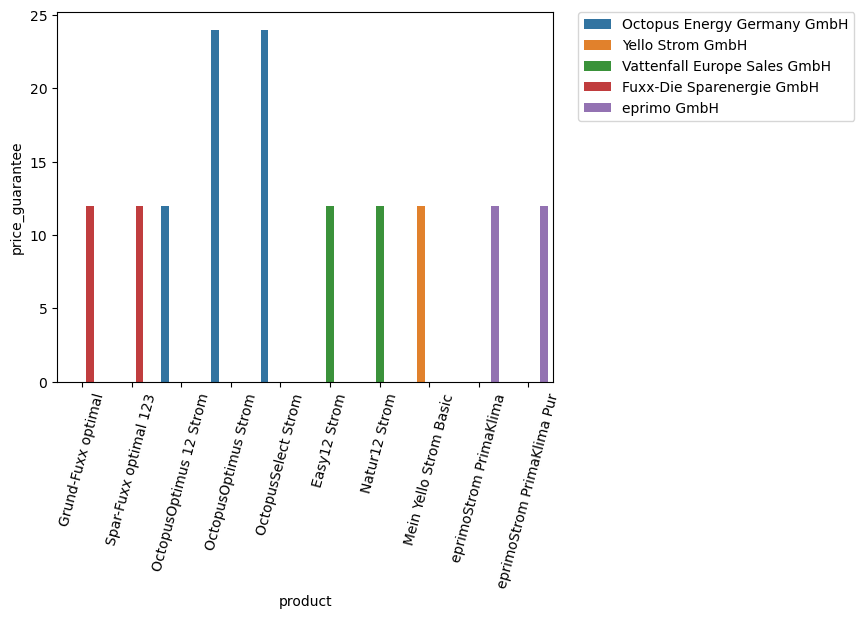

In [184]:
#pr guar br chart
bchpg = sns.barplot(data = df, y = "price_guarantee", x = "product",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur"], 
            hue = "provider")
plt.setp(bchpg.get_xticklabels(), rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [42]:
#provider - contract_length
prov_con_length = df.groupby(["provider"]).agg({"contract_length":['min', 'mean', 'max']}) 
prov_con_length

contract_length          
                                         min  mean max
provider                                              
Fuxx-Die Sparenergie GmbH                 12 12.00  12
Octopus Energy Germany GmbH                1  1.00   1
Vattenfall Europe Sales GmbH              12 12.00  12
Yello Strom GmbH                          12 12.00  12
eprimo GmbH                               12 12.00  12

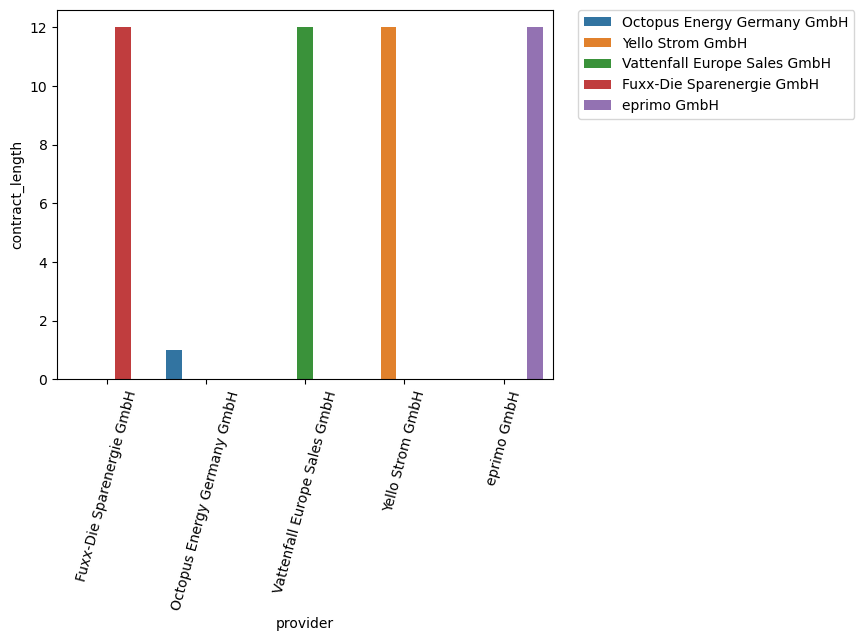

In [180]:
#contract length br chart
bchcl = sns.barplot(data = df, y = "contract_length", x = "provider",
                 order = ["Fuxx-Die Sparenergie GmbH", "Octopus Energy Germany GmbH", "Vattenfall Europe Sales GmbH",
                     "Yello Strom GmbH", "eprimo GmbH"], 
            hue = "provider")
plt.setp(bchcl.get_xticklabels(), rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [43]:
#provider - product - standing_charge_ratio
prov_prod_st_ratio = df.groupby(["provider","product"]).agg({"standing_charge_percent":['min', 'mean', 'max']}) 
prov_prod_st_ratio

standing_charge_percent  \
                                                                            min   
provider                     product                                              
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                            9.75   
                             Spar-Fuxx optimal 123                         9.42   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom                      11.60   
                             OctopusOptimus Strom                         11.87   
                             OctopusSelect Strom                          11.38   
Vattenfall Europe Sales GmbH Easy12 Strom                                  8.34   
                             Natur12 Strom                                 9.85   
Yello Strom GmbH             Mein Yello Strom Basic                       13.22   
eprimo GmbH                  eprimoStrom PrimaKlima                       11.01   
                             eprimoStrom PrimaKlima Pur                   10.91   

                                                                     
                                                         mean   max  
provider                     product                                 
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         10.07 10.37  
                             Spar-Fuxx optimal 123      10.14 10.62  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom    11.88 12.05  
                             OctopusOptimus Strom       11.87 11.87  
                             OctopusSelect Strom        11.38 11.38  
Vattenfall Europe Sales GmbH Easy12 Strom                8.45  8.56  
                             Natur12 Strom              10.08 10.21  
Yello Strom GmbH             Mein Yello Strom Basic     13.22 13.22  
eprimo GmbH                  eprimoStrom PrimaKlima     11.43 11.85  
                             eprimoStrom PrimaKlima Pur 10.91 10.91

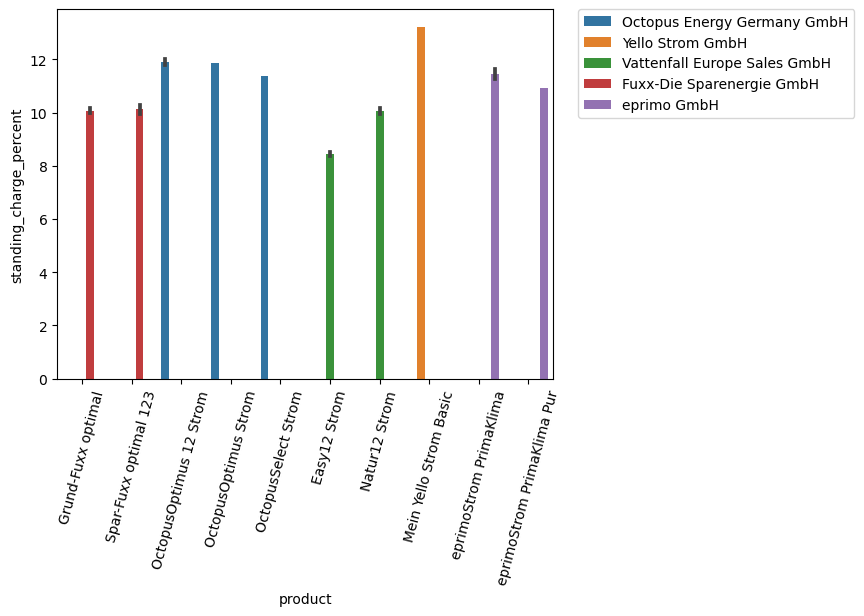

In [209]:
#st ch percent br chart
bchschp = sns.barplot(data = df, y = "standing_charge_percent", x = "product",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur"], 
            hue = "provider")
plt.setp(bchschp.get_xticklabels(), rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [44]:
#provider - product - cons_cost_ratio
prov_prod_cons_cost_ratio = df.groupby(["provider","product"]).agg({"consumption_cost_percent":['min', 'mean', 'max']}) 
prov_prod_cons_cost_ratio

consumption_cost_percent  \
                                                                             min   
provider                     product                                               
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                           112.08   
                             Spar-Fuxx optimal 123                        116.75   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom                       87.95   
                             OctopusOptimus Strom                          88.13   
                             OctopusSelect Strom                           88.62   
Vattenfall Europe Sales GmbH Easy12 Strom                                  92.34   
                             Natur12 Strom                                 91.89   
Yello Strom GmbH             Mein Yello Strom Basic                        90.39   
eprimo GmbH                  eprimoStrom PrimaKlima                       111.03   
                             eprimoStrom PrimaKlima Pur                   107.03   

                                                                       
                                                          mean    max  
provider                     product                                   
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         112.46 112.83  
                             Spar-Fuxx optimal 123      117.12 117.68  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom     88.12  88.40  
                             OctopusOptimus Strom        88.13  88.13  
                             OctopusSelect Strom         88.62  88.62  
Vattenfall Europe Sales GmbH Easy12 Strom                92.44  92.54  
                             Natur12 Strom               92.28  92.51  
Yello Strom GmbH             Mein Yello Strom Basic      90.39  90.39  
eprimo GmbH                  eprimoStrom PrimaKlima     113.82 114.72  
                             eprimoStrom PrimaKlima Pur 107.03 107.03

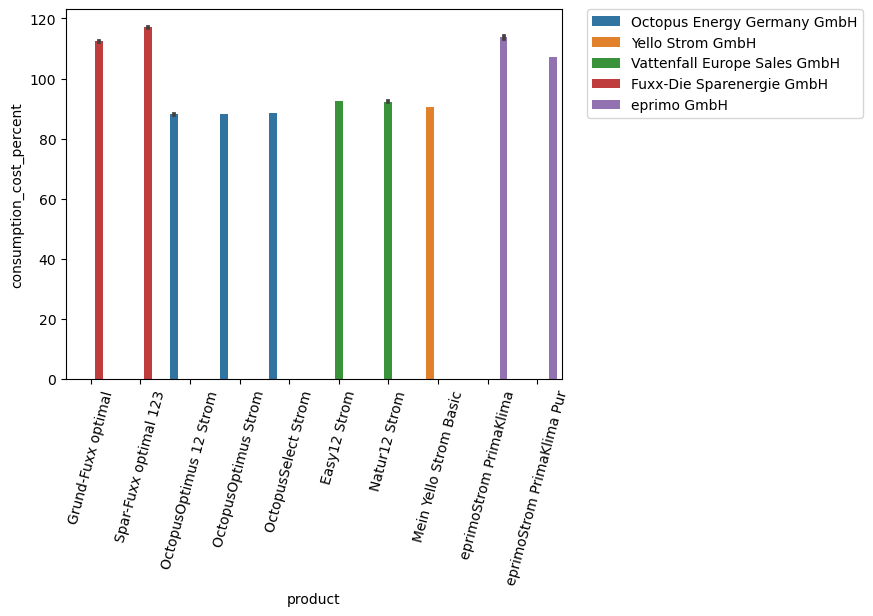

In [205]:
#cons cost perc percent br chart
bchccp = sns.barplot(data = df, y = "consumption_cost_percent", x = "product",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur"], 
            hue = "provider")
plt.setp(bchccp.get_xticklabels(), rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [45]:
#provider - product - bonus_ratio
prov_prod_bonus_ratio = df.groupby(["provider","product"]).agg({"bonus_percent":['min', 'mean', 'max']}) 
prov_prod_bonus_ratio

bonus_percent        \
                                                                  min  mean   
provider                     product                                          
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal                 22.45 22.53   
                             Spar-Fuxx optimal 123              27.11 27.26   
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom             0.00  0.00   
                             OctopusOptimus Strom                0.00  0.00   
                             OctopusSelect Strom                 0.00  0.00   
Vattenfall Europe Sales GmbH Easy12 Strom                        0.88  0.89   
                             Natur12 Strom                       1.75  2.35   
Yello Strom GmbH             Mein Yello Strom Basic              3.61  3.61   
eprimo GmbH                  eprimoStrom PrimaKlima             22.51 25.25   
                             eprimoStrom PrimaKlima Pur         17.94 17.94   

                                                               
                                                          max  
provider                     product                           
Fuxx-Die Sparenergie GmbH    Grund-Fuxx optimal         22.63  
                             Spar-Fuxx optimal 123      27.38  
Octopus Energy Germany GmbH  OctopusOptimus 12 Strom     0.00  
                             OctopusOptimus Strom        0.00  
                             OctopusSelect Strom         0.00  
Vattenfall Europe Sales GmbH Easy12 Strom                0.90  
                             Natur12 Strom               2.72  
Yello Strom GmbH             Mein Yello Strom Basic      3.61  
eprimo GmbH                  eprimoStrom PrimaKlima     26.37  
                             eprimoStrom PrimaKlima Pur 17.94

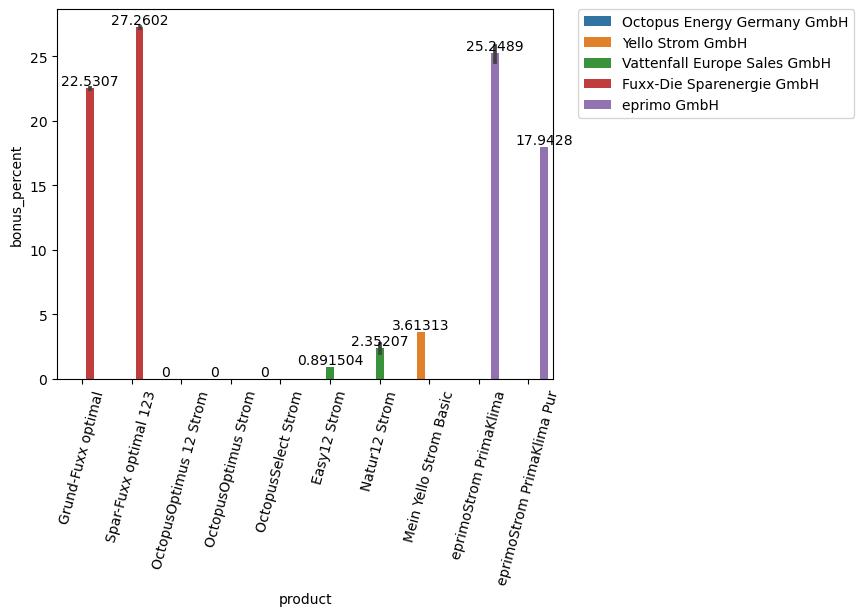

In [211]:
#bonus percent br chart
bchbp = sns.barplot(data = df, y = "bonus_percent", x = "product",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur"], 
            hue = "provider")
plt.setp(bchbp.get_xticklabels(), rotation=75)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
for container in bchbp.containers:
    bchbp.bar_label(container)

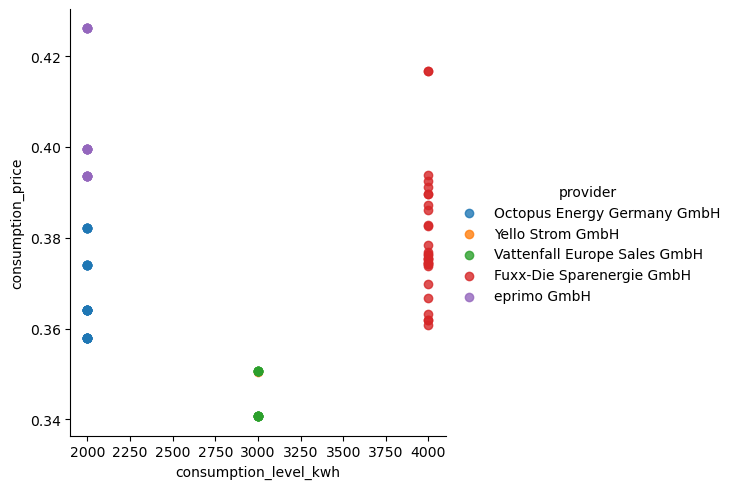

In [46]:
# Plot
gridobj = sns.lmplot(x="consumption_level_kwh", y="consumption_price", hue="provider", data=df)

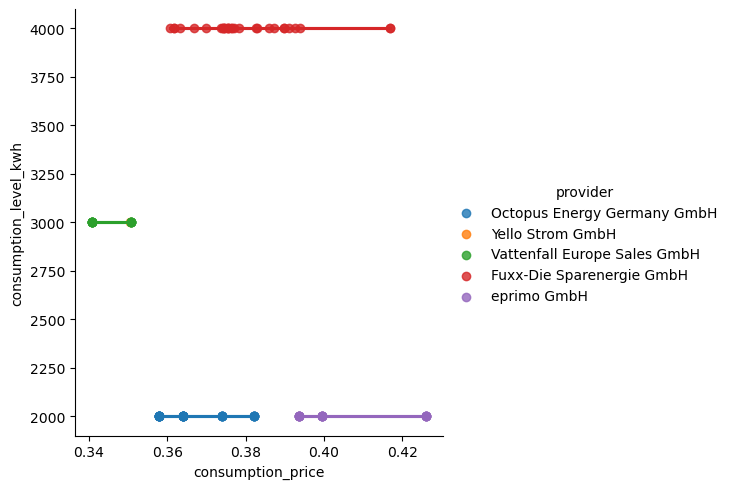

In [47]:
# Plot
gridobj = sns.lmplot(x="consumption_price", y="consumption_level_kwh", hue="provider", data=df)

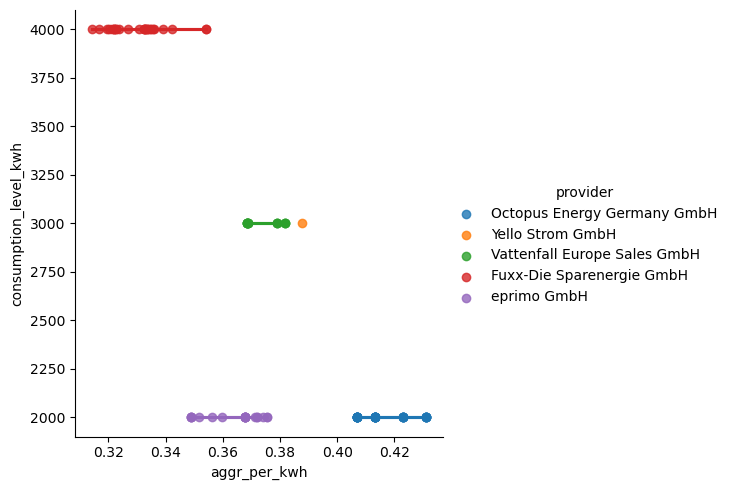

In [48]:
# Plot
gridobj = sns.lmplot(x="aggr_per_kwh", y="consumption_level_kwh", hue="provider", data=df)

<Figure size 800x640 with 0 Axes>

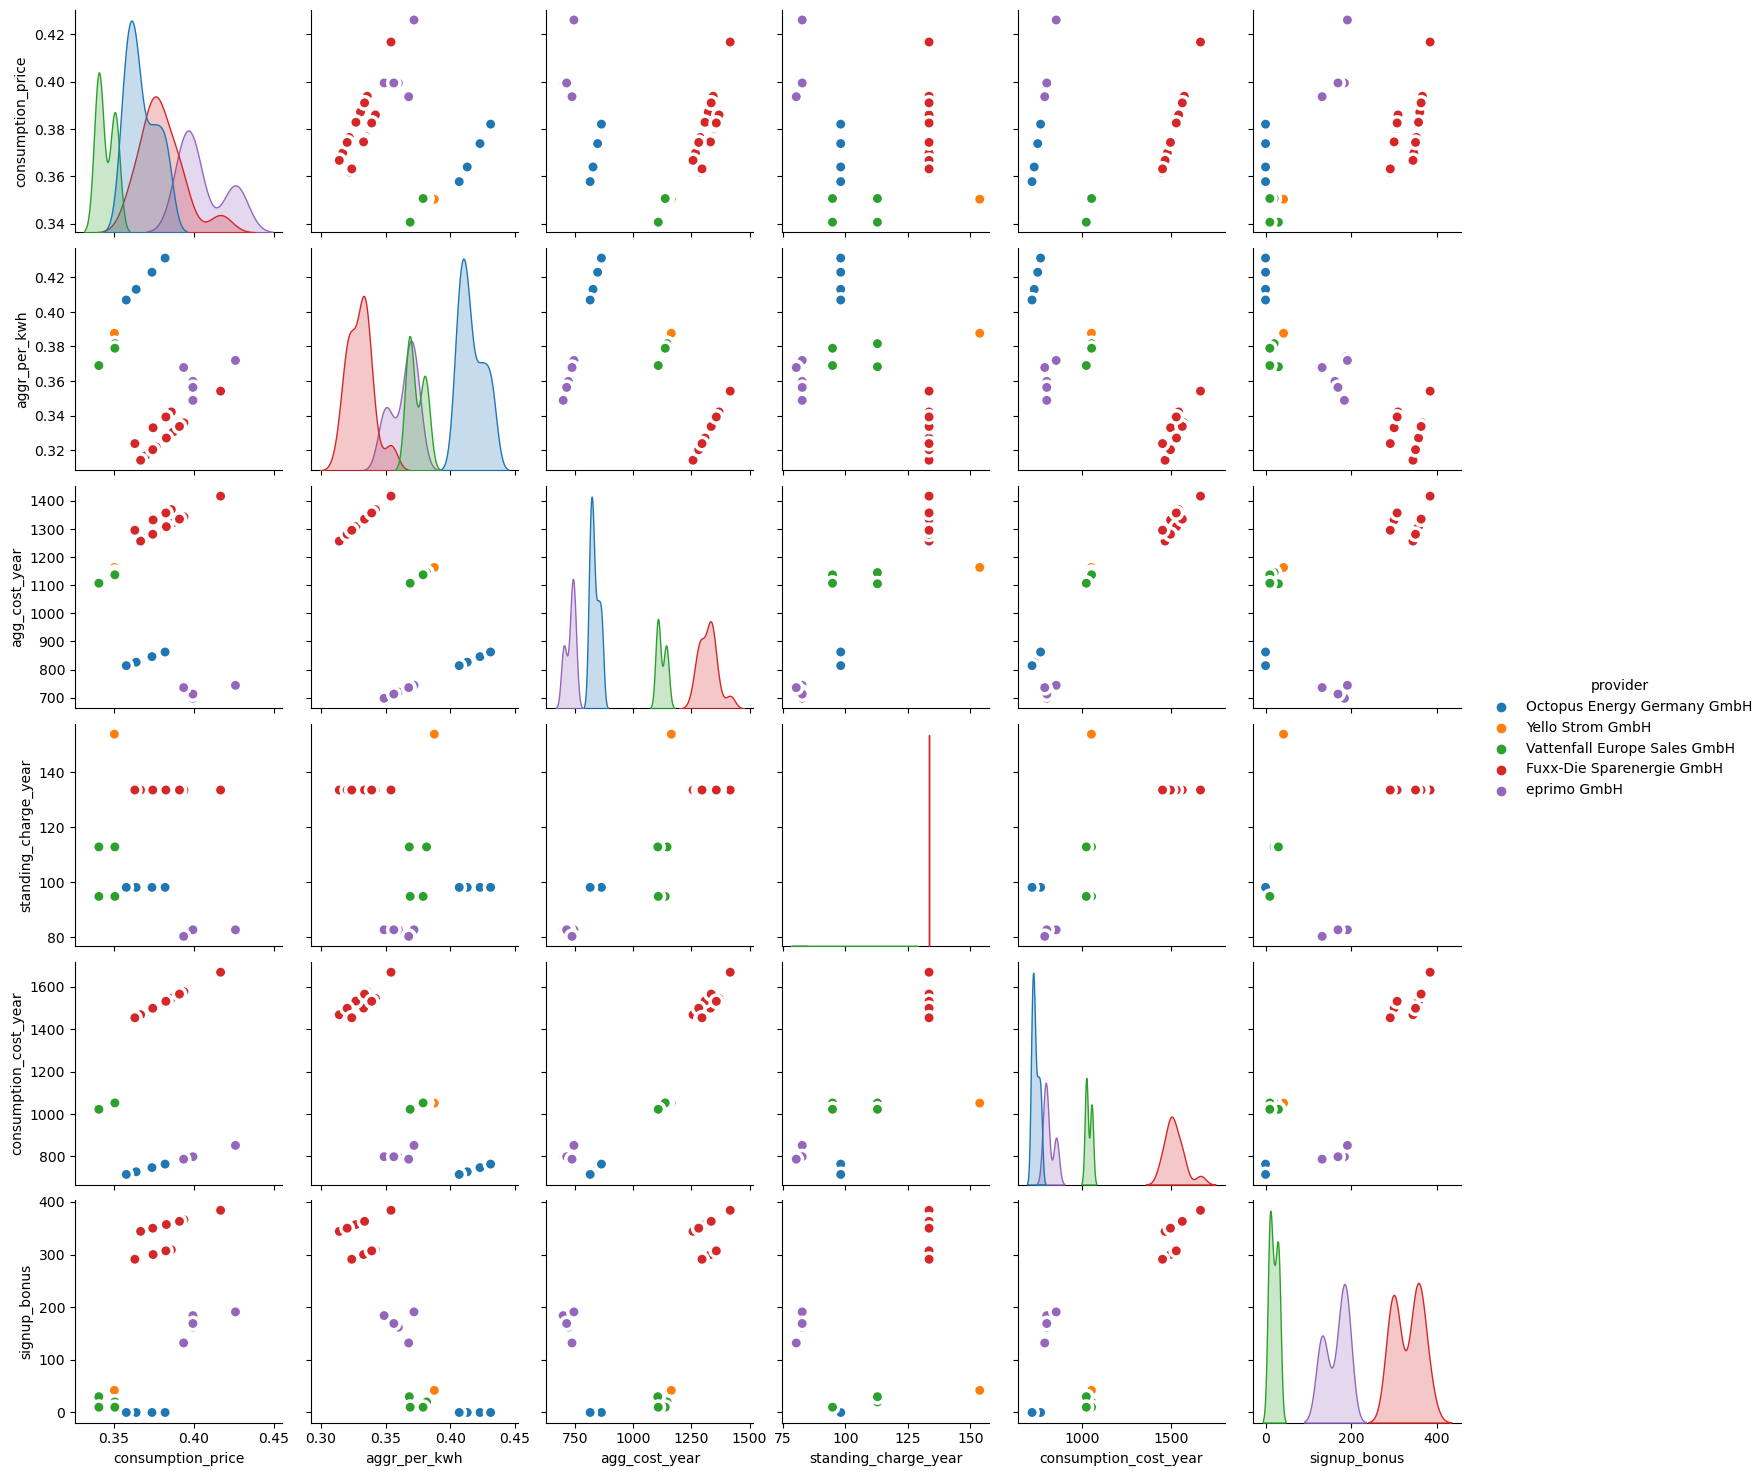

In [49]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="provider", 
             vars=["consumption_price", "aggr_per_kwh", "agg_cost_year", "standing_charge_year", "consumption_cost_year", "signup_bonus"],
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

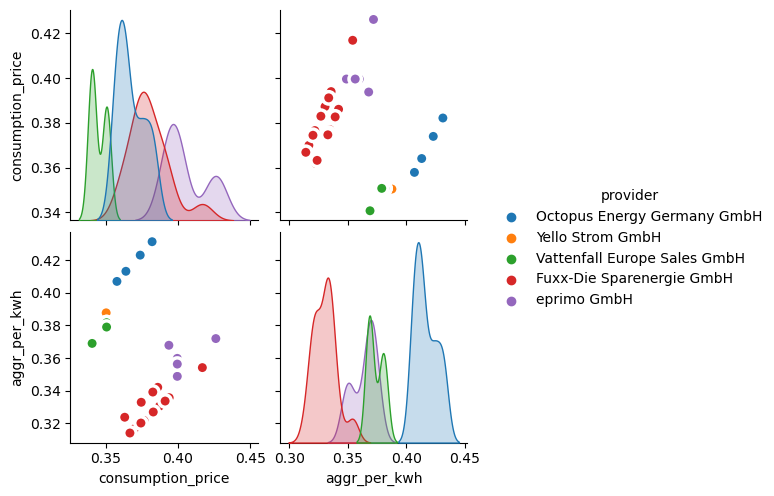

In [50]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="provider", 
             vars=["consumption_price", "aggr_per_kwh"],
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

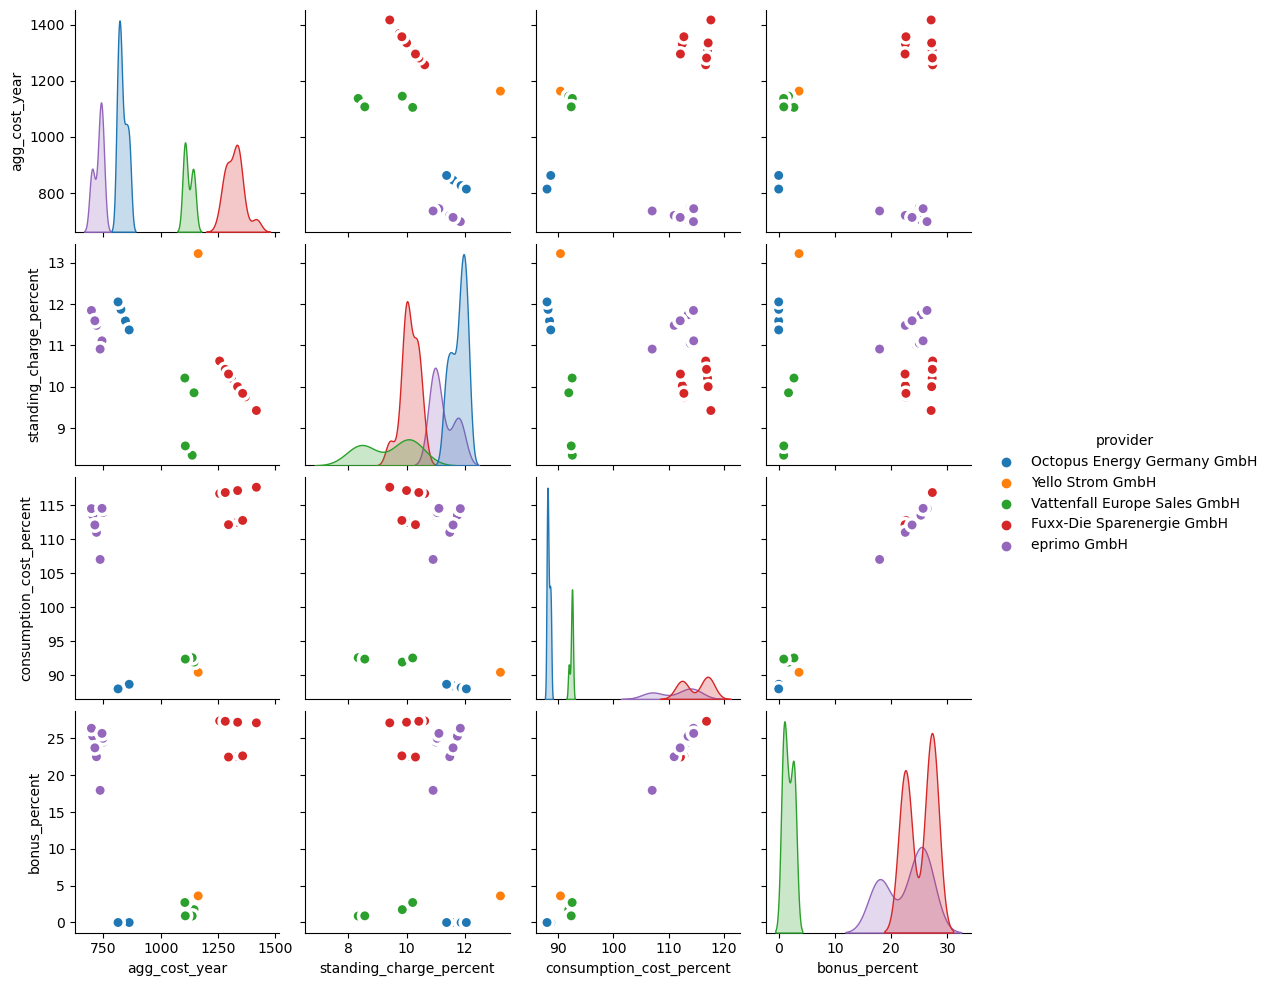

In [51]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="provider", 
             vars=["agg_cost_year","standing_charge_percent", "consumption_cost_percent", "bonus_percent"],
             plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [52]:
fig = go.Figure(go.Waterfall(
    measure = ["relative", "relative", "relative", "total"],
    x = ["Standing charge", "Consumption cost", "Sign-up bonus", "Aggregated cost"],
    textposition = "outside",
    text = ["+10.11%", "+115.03%", "-25.14%", "Total"],
    y = [10.11, 115.03, -25.14, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Fuxx 1",
        showlegend = False
)

fig.show()

In [53]:
fig = go.Figure(go.Waterfall(
    measure = ["relative", "relative", "relative", "total"],
    x = ["Standing charge", "Consumption cost", "Sign-up bonus", "Aggregated cost"],
    textposition = "outside",
    text = ["+11.78%", "+88.22%", "-0%", "Total"],
    y = [11.78, 88.22, 0, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "OE",
        showlegend = False
)

fig.show()

In [54]:
fig = go.Figure(go.Waterfall(
    measure = ["relative", "relative", "relative", "total"],
    x = ["Standing charge", "Consumption cost", "Sign-up bonus", "Aggregated cost"],
    textposition = "outside",
    text = ["+9.38%", "+92.35%", "-1.73%", "Total"],
    y = [9.38, 92.35, -1.73, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Vattenfall",
        showlegend = False
)

fig.show()

In [55]:
fig = go.Figure(go.Waterfall(
    measure = ["relative", "relative", "relative", "total"],
    x = ["Standing charge", "Consumption cost", "Sign-up bonus", "Aggregated cost"],
    textposition = "outside",
    text = ["+13.22%", "+90.39%", "-3.61%", "Total"],
    y = [13.22, 90.39, -3.61, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "Yello",
        showlegend = False
)

fig.show()

In [56]:
fig = go.Figure(go.Waterfall(
    measure = ["relative", "relative", "relative", "total"],
    x = ["Standing charge", "Consumption cost", "Sign-up bonus", "Aggregated cost"],
    textposition = "outside",
    text = ["+11.25%", "+111.44%", "-22.69%", "Total"],
    y = [11.25, 111.44, -22.69, 0],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
))

fig.update_layout(
        title = "eprimo",
        showlegend = False
)

fig.show()

In [57]:
#for waterfalls
#provider - standing_charge_ratio
prov_st_ratio = df.groupby(["provider"]).agg({"standing_charge_percent":['mean']}) 
prov_st_ratio

standing_charge_percent
                                                mean
provider                                            
Fuxx-Die Sparenergie GmbH                      10.11
Octopus Energy Germany GmbH                    11.78
Vattenfall Europe Sales GmbH                    9.38
Yello Strom GmbH                               13.22
eprimo GmbH                                    11.25

In [58]:
prov_st_ratio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Fuxx-Die Sparenergie GmbH to eprimo GmbH
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (standing_charge_percent, mean)  5 non-null      float64
dtypes: float64(1)
memory usage: 80.0+ bytes


In [60]:
#for waterfalls
#provider - cons_cost_ratio
prov_cons_cost_ratio = df.groupby(["provider"]).agg({"consumption_cost_percent":['mean']}) 
prov_cons_cost_ratio


consumption_cost_percent
                                                 mean
provider                                             
Fuxx-Die Sparenergie GmbH                      115.03
Octopus Energy Germany GmbH                     88.22
Vattenfall Europe Sales GmbH                    92.35
Yello Strom GmbH                                90.39
eprimo GmbH                                    111.44

In [61]:
#for waterfalls
#provider - bonus_ratio
prov_bonus_ratio = df.groupby(["provider"]).agg({"bonus_percent":['mean']}) 
prov_bonus_ratio

bonus_percent
                                      mean
provider                                  
Fuxx-Die Sparenergie GmbH            25.14
Octopus Energy Germany GmbH           0.00
Vattenfall Europe Sales GmbH          1.73
Yello Strom GmbH                      3.61
eprimo GmbH                          22.69

In [213]:
#from scipy import stats
# import the data



In [214]:
#stats.ttest_ind(df[(df['provider'] == 'Octopus Energy Germany GmbH')]['consumption_cost_year'], df[(df['provider'] == 'Yello Strom GmbH')]['consumption_cost_year'])

C:\Users\49152\AppData\Local\Temp\ipykernel_33020\3182068966.py:1: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\49152\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning:

divide by zero encountered in divide

C:\Users\49152\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning:

invalid value encountered in double_scalars



Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
#"consumption_price", "aggr_per_kwh", "agg_cost_year", "standing_charge_year", "consumption_cost_year", "signup_bonus"

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, '')]]

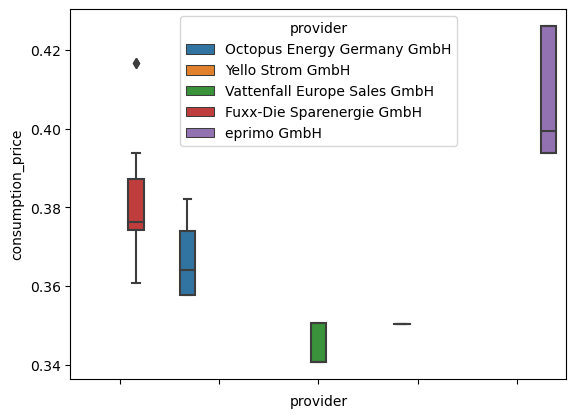

In [124]:
#boxplot cons price provider
sns.boxplot(data = df, y = "consumption_price", x = "provider",
                 order = ["Fuxx-Die Sparenergie GmbH", "Octopus Energy Germany GmbH", "Vattenfall Europe Sales GmbH",
                     "Yello Strom GmbH", "eprimo GmbH"], 
            hue = "provider").set(xticklabels=[])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

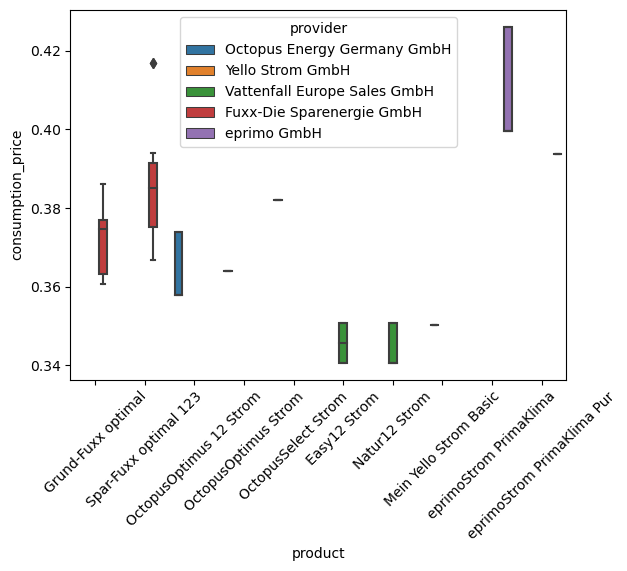

In [121]:
#cons price boxplot - pr product
axcpp = sns.boxplot(data = df, y = "consumption_price", x = "product", hue = "provider",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ]
                 )
plt.setp(axcpp.get_xticklabels(), rotation=45)

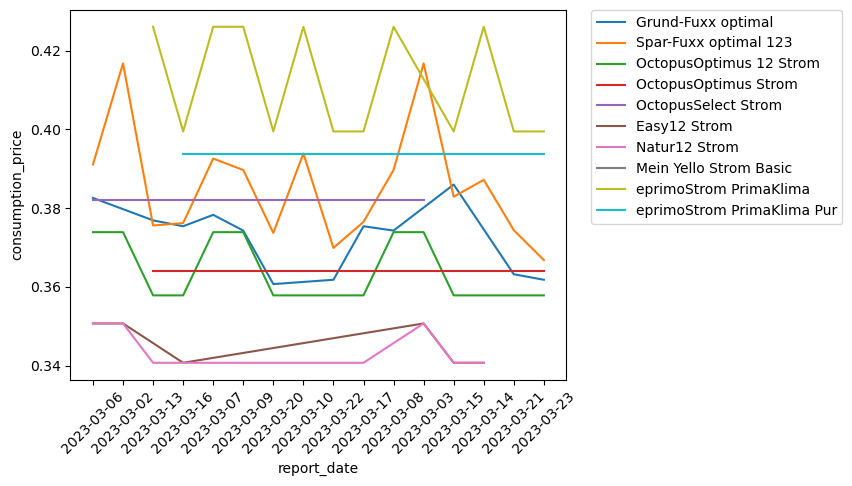

In [149]:
#scatter date - con sprice - provider - product
spcppp = sns.lineplot(data = df, x="report_date", y="consumption_price", hue="product",
                     hue_order  = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ])
plt.setp(spcppp.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

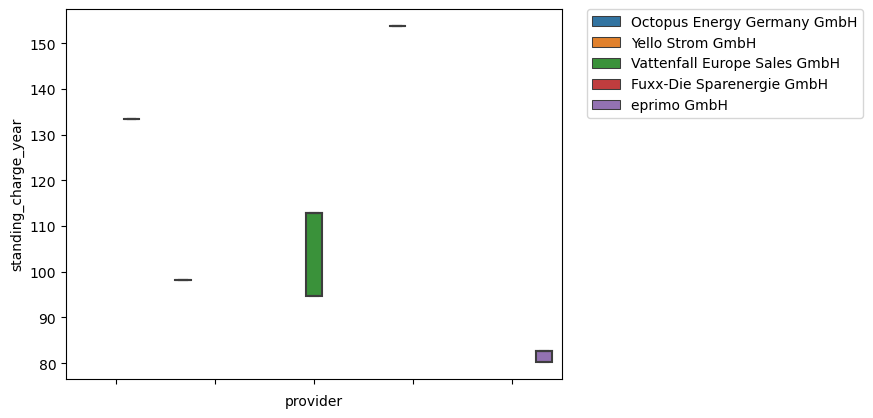

In [123]:
#boxplot standing_charge_year provider
sns.boxplot(data = df, y = "standing_charge_year", x = "provider",
                 order = ["Fuxx-Die Sparenergie GmbH", "Octopus Energy Germany GmbH", "Vattenfall Europe Sales GmbH",
                     "Yello Strom GmbH", "eprimo GmbH"], 
            hue = "provider").set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

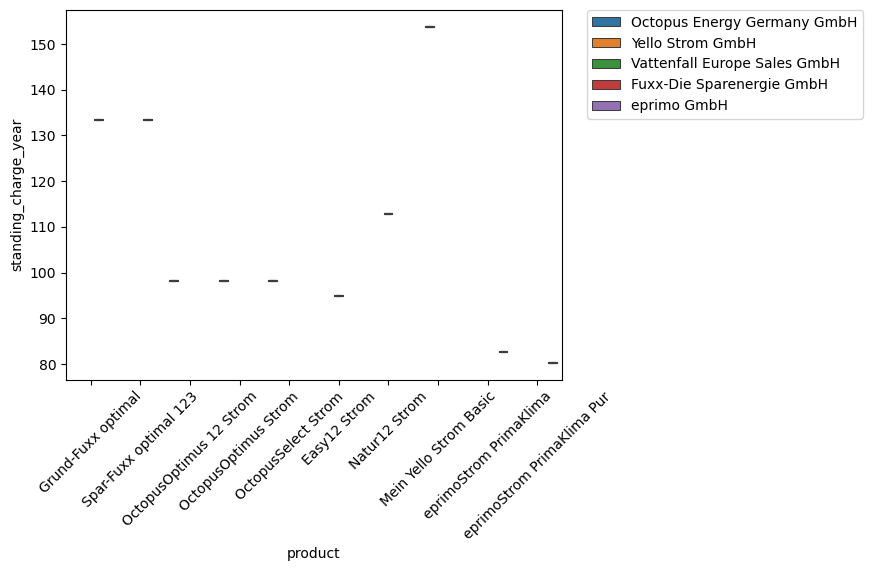

In [126]:
#boxplot standing_charge_year product
axscp = sns.boxplot(data = df, y = "standing_charge_year", x = "product", hue = "provider",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ]
                 )
plt.setp(axscp.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

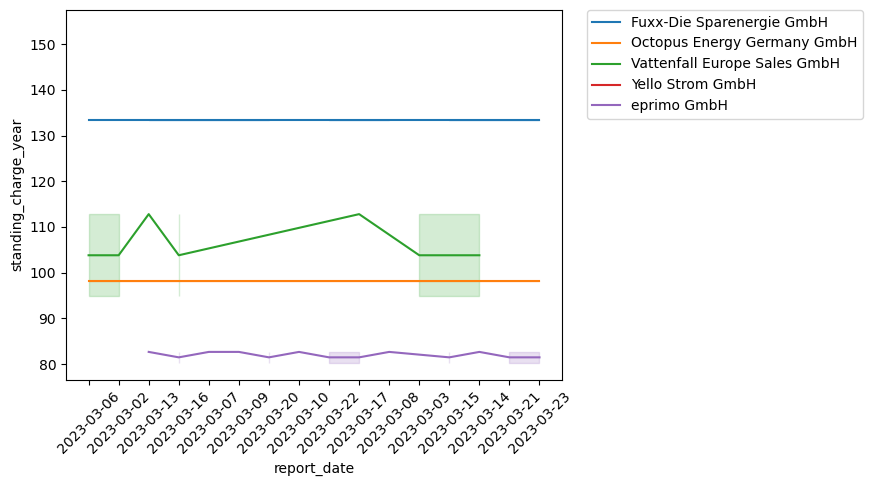

In [147]:
#scatter date - standing charge - provider
spscp = sns.lineplot(data = df, x="report_date", y="standing_charge_year", hue="provider",
                     hue_order = ["Fuxx-Die Sparenergie GmbH", "Octopus Energy Germany GmbH", "Vattenfall Europe Sales GmbH",
                     "Yello Strom GmbH", "eprimo GmbH"])
plt.setp(spscp.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

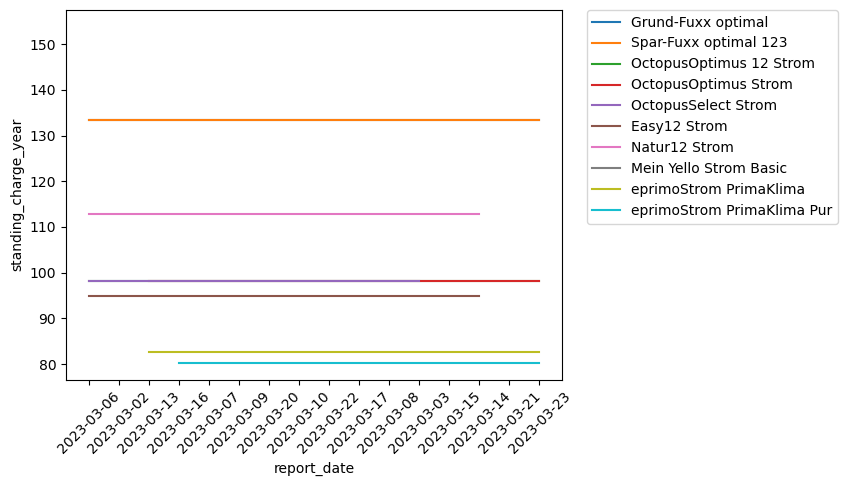

In [146]:
#scatter date - standing charge - provider - product
spscpp = sns.lineplot(data = df, x="report_date", y="standing_charge_year", hue="product",
                     hue_order  = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ])
plt.setp(spscpp.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

[[Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, '')]]

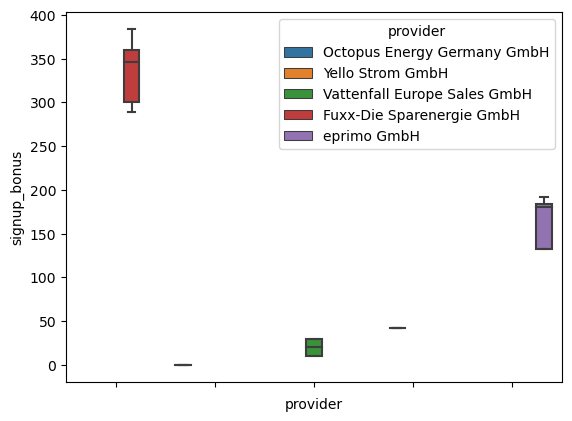

In [130]:
#boxplot bonus provider
sns.boxplot(data = df, y = "signup_bonus", x = "provider",
                 order = ["Fuxx-Die Sparenergie GmbH", "Octopus Energy Germany GmbH", "Vattenfall Europe Sales GmbH",
                     "Yello Strom GmbH", "eprimo GmbH"], 
            hue = "provider").set(xticklabels=[])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

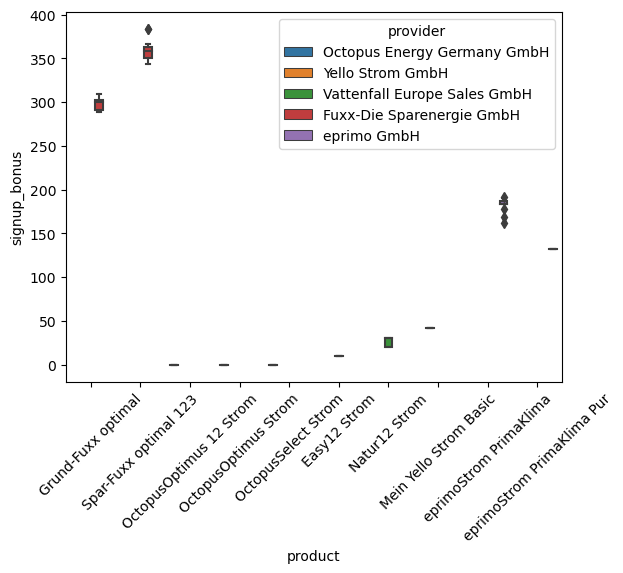

In [129]:
#boxplot bonus product
axbp = sns.boxplot(data = df, y = "signup_bonus", x = "product", hue = "provider",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ]
                 )
plt.setp(axbp.get_xticklabels(), rotation=45)

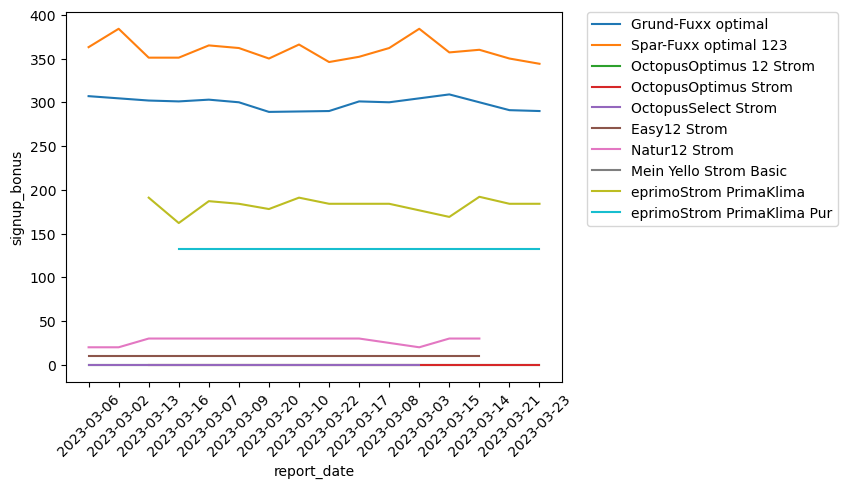

In [148]:
#scatter date - bonus - provider - product
spbpp = sns.lineplot(data = df, x="report_date", y="signup_bonus", hue="product",
                     hue_order  = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ])
plt.setp(spbpp.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

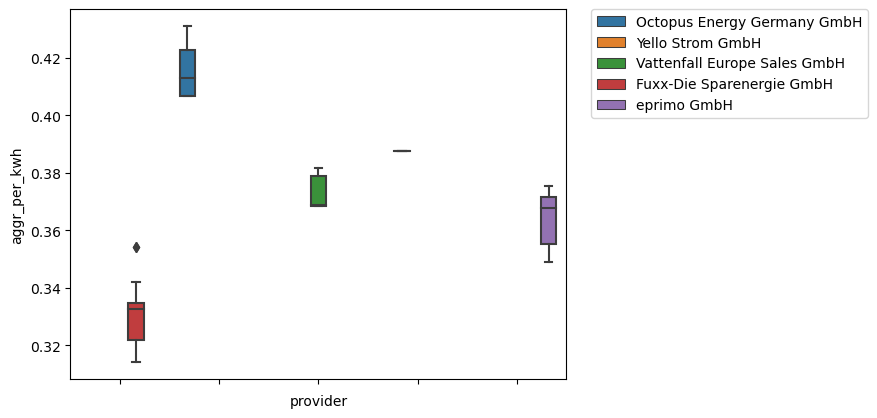

In [132]:
#boxplot aggr price provider
sns.boxplot(data = df, y = "aggr_per_kwh", x = "provider",
                 order = ["Fuxx-Die Sparenergie GmbH", "Octopus Energy Germany GmbH", "Vattenfall Europe Sales GmbH",
                     "Yello Strom GmbH", "eprimo GmbH"], 
            hue = "provider").set(xticklabels=[])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

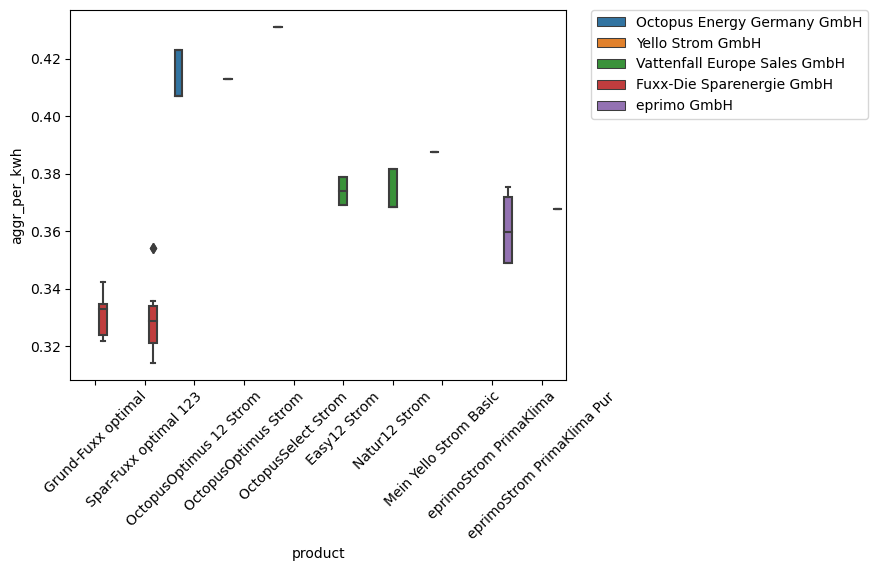

In [134]:
#boxplot aggr product
axap = sns.boxplot(data = df, y = "aggr_per_kwh", x = "product", hue = "provider",
                 order = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ]
                 )
plt.setp(axap.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

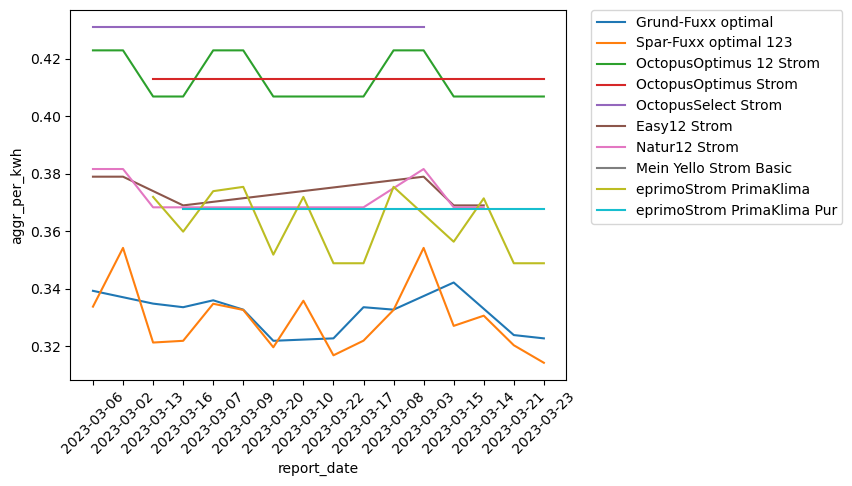

In [150]:
#scatter date - agg pr - provider - product
spappp = sns.lineplot(data = df, x="report_date", y="aggr_per_kwh", hue="product",
                     hue_order  = ["Grund-Fuxx optimal","Spar-Fuxx optimal 123", 
                          "OctopusOptimus 12 Strom" , "OctopusOptimus Strom", "OctopusSelect Strom",
                          "Easy12 Strom", "Natur12 Strom",
                          "Mein Yello Strom Basic",
                          "eprimoStrom PrimaKlima",
                          "eprimoStrom PrimaKlima Pur" ])
plt.setp(spappp.get_xticklabels(), rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [152]:
#correlation check
df.corr()

C:\Users\49152\AppData\Local\Temp\ipykernel_33020\4145218019.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



zip_code  consumption_level_kwh  agg_cost_year  \
zip_code                       NaN                    NaN            NaN   
consumption_level_kwh          NaN                   1.00           0.98   
agg_cost_year                  NaN                   0.98           1.00   
standing_charge_year           NaN                   0.91           0.93   
consumption_cost_year          NaN                   0.98           0.95   
signup_bonus                   NaN                   0.78           0.66   
price_guarantee                NaN                  -0.38          -0.30   
contract_length                NaN                   0.61           0.50   
aggr_per_kwh                   NaN                  -0.80          -0.67   
consumption_price              NaN                  -0.11          -0.22   
standing_charge_percent        NaN                  -0.69          -0.71   
consumption_cost_percent       NaN                   0.60           0.44   
bonus_percent                  NaN                   0.55           0.39   
check1                         NaN                  -0.13          -0.24   

                          standing_charge_year  consumption_cost_year  \
zip_code                                   NaN                    NaN   
consumption_level_kwh                     0.91                   0.98   
agg_cost_year                             0.93                   0.95   
standing_charge_year                      1.00                   0.88   
consumption_cost_year                     0.88                   1.00   
signup_bonus                              0.63                   0.86   
price_guarantee                          -0.20                  -0.39   
contract_length                           0.31                   0.63   
aggr_per_kwh                             -0.58                  -0.83   
consumption_price                        -0.23                   0.06   
standing_charge_percent                  -0.40                  -0.66   
consumption_cost_percent                  0.38                   0.70   
bonus_percent                             0.35                   0.66   
check1                                   -0.26                  -0.08   

                          signup_bonus  price_guarantee  contract_length  \
zip_code                           NaN              NaN              NaN   
consumption_level_kwh             0.78            -0.38             0.61   
agg_cost_year                     0.66            -0.30             0.50   
standing_charge_year              0.63            -0.20             0.31   
consumption_cost_year             0.86            -0.39             0.63   
signup_bonus                      1.00            -0.43             0.68   
price_guarantee                  -0.43             1.00            -0.63   
contract_length                   0.68            -0.63             1.00   
aggr_per_kwh                     -0.89             0.59            -0.86   
consumption_price                 0.48            -0.10             0.27   
standing_charge_percent          -0.41             0.38            -0.66   
consumption_cost_percent          0.95            -0.49             0.78   
bonus_percent                     0.94            -0.47             0.74   
check1                            0.18            -0.20             0.11   

                          aggr_per_kwh  consumption_price  \
zip_code                           NaN                NaN   
consumption_level_kwh            -0.80              -0.11   
agg_cost_year                    -0.67              -0.22   
standing_charge_year             -0.58              -0.23   
consumption_cost_year            -0.83               0.06   
signup_bonus                     -0.89               0.48   
price_guarantee                   0.59              -0.10   
contract_length                  -0.86               0.27   
aggr_per_kwh                      1.00              -0.21   
consumption_price                -0.21

In [174]:
df.corr().iloc[2:8,2:8]

C:\Users\49152\AppData\Local\Temp\ipykernel_33020\213379640.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



agg_cost_year  standing_charge_year  \
agg_cost_year                   1.00                  0.93   
standing_charge_year            0.93                  1.00   
consumption_cost_year           0.95                  0.88   
signup_bonus                    0.66                  0.63   
price_guarantee                -0.30                 -0.20   
contract_length                 0.50                  0.31   

                       consumption_cost_year  signup_bonus  price_guarantee  \
agg_cost_year                           0.95          0.66            -0.30   
standing_charge_year                    0.88          0.63            -0.20   
consumption_cost_year                   1.00          0.86            -0.39   
signup_bonus                            0.86          1.00            -0.43   
price_guarantee                        -0.39         -0.43             1.00   
contract_length                         0.63          0.68            -0.63   

                       contract_length  
agg_cost_year                     0.50  
standing_charge_year              0.31  
consumption_cost_year             0.63  
signup_bonus                      0.68  
price_guarantee                  -0.63  
contract_length                   1.00

In [172]:
df.corr().iloc[10:13,10:13]

C:\Users\49152\AppData\Local\Temp\ipykernel_33020\2818311909.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



standing_charge_percent  consumption_cost_percent  \
standing_charge_percent                      1.00                     -0.36   
consumption_cost_percent                    -0.36                      1.00   
bonus_percent                               -0.28                      1.00   

                          bonus_percent  
standing_charge_percent           -0.28  
consumption_cost_percent           1.00  
bonus_percent                      1.00

In [87]:
#Fuxx cons cost Outliers 
df.loc[(df["provider"] == "Fuxx-Die Sparenergie GmbH") & (df["consumption_price"] > 0.4)]

zip_code location_name                   provider                product  \
15     81671       München  Fuxx-Die Sparenergie GmbH  Spar-Fuxx optimal 123   
38     81671       München  Fuxx-Die Sparenergie GmbH  Spar-Fuxx optimal 123   

    consumption_level_kwh  agg_cost_year  standing_charge_year  \
15                   4000        1416.69                133.49   
38                   4000        1416.69                133.49   

    consumption_cost_year  signup_bonus  price_guarantee  contract_length  \
15                1667.20        384.00               12               12   
38                1667.20        384.00               12               12   

   report_date  aggr_per_kwh  consumption_price  standing_charge_percent  \
15  2023-03-02          0.35               0.42                     9.42   
38  2023-03-03          0.35               0.42                     9.42   

    consumption_cost_percent  bonus_percent  check1  
15                    117.68          27.11  100.00  
38                    117.68          27.11  100.00